In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [24]:
df_geo = pd.read_csv('/Users/jiaxincui/Documents/GitHub/git-exercise-AllysonCui/Data/Other/data.csv')
df_pc = pd.read_csv('/Users/jiaxincui/Documents/GitHub/git-exercise-AllysonCui/Data/Kaggle/president_county.csv')

pd.set_option('display.max_columns', None)
df_geo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4633 entries, 0 to 4632
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   4633 non-null   int64  
 1   state        4633 non-null   object 
 2   county       4633 non-null   object 
 3   candidate    4633 non-null   object 
 4   party        4633 non-null   object 
 5   total_votes  4633 non-null   int64  
 6   won          4633 non-null   bool   
 7   lat          2985 non-null   float64
 8   lng          2985 non-null   float64
 9   population   2985 non-null   float64
 10  density      2985 non-null   float64
dtypes: bool(1), float64(4), int64(2), object(4)
memory usage: 366.6+ KB


In [25]:
df_geo['TOTAL'] = df_pc['current_votes']
df_geo['ratio'] = df_geo["total_votes"] / df_geo['TOTAL']
df_geo.head(10)

,Unnamed: 0,state,county,candidate,party,total_votes,won,lat,lng,population,density,TOTAL,ratio
0,0,Delaware,Kent,Joe Biden,DEM,44552,True,39.1610,-75.5202,125931.0,617.0,87025,0.511945
1,1,Delaware,New Castle,Joe Biden,DEM,195034,True,39.7415,-75.5416,70655.0,2503.0,287633,0.678065
2,2,Delaware,Sussex,Donald Trump,REP,71230,True,38.9091,-75.4227,11463.0,449.0,129352,0.550668
3,3,District of Columbia,Ward 1,Joe Biden,DEM,39041,True,38.9072,-77.0369,82404.0,12910.0,41681,0.936662
4,4,District of Columbia,Ward 2,Joe Biden,DEM,29078,True,38.9063,-77.0340,76492.0,4624.0,32881,0.884341
5,5,District of Columbia,Ward 3,Joe Biden,DEM,39397,True,38.9884,-77.0900,82450.0,3059.0,44231,0.890710
6,6,District of Columbia,Ward 4,Joe Biden,DEM,42489,True,38.9310,-77.0380,86085.0,3740.0,45296,0.938030
7,7,District of Columbia,Ward 5,Joe Biden,DEM,43320,True,38.9717,-77.0089,88948.0,3369.0,46107,0.939554
8,8,District of Columbia,Ward 6,Joe Biden,DEM,56719,True,38.8869,-76.9896,102233.0,6893.0,62918,0.901475
9,9,District of Columbia,Ward 7,Joe Biden,DEM,36382,True,38.8582,-76.9478,81270.0,3734.0,38384,0.947843


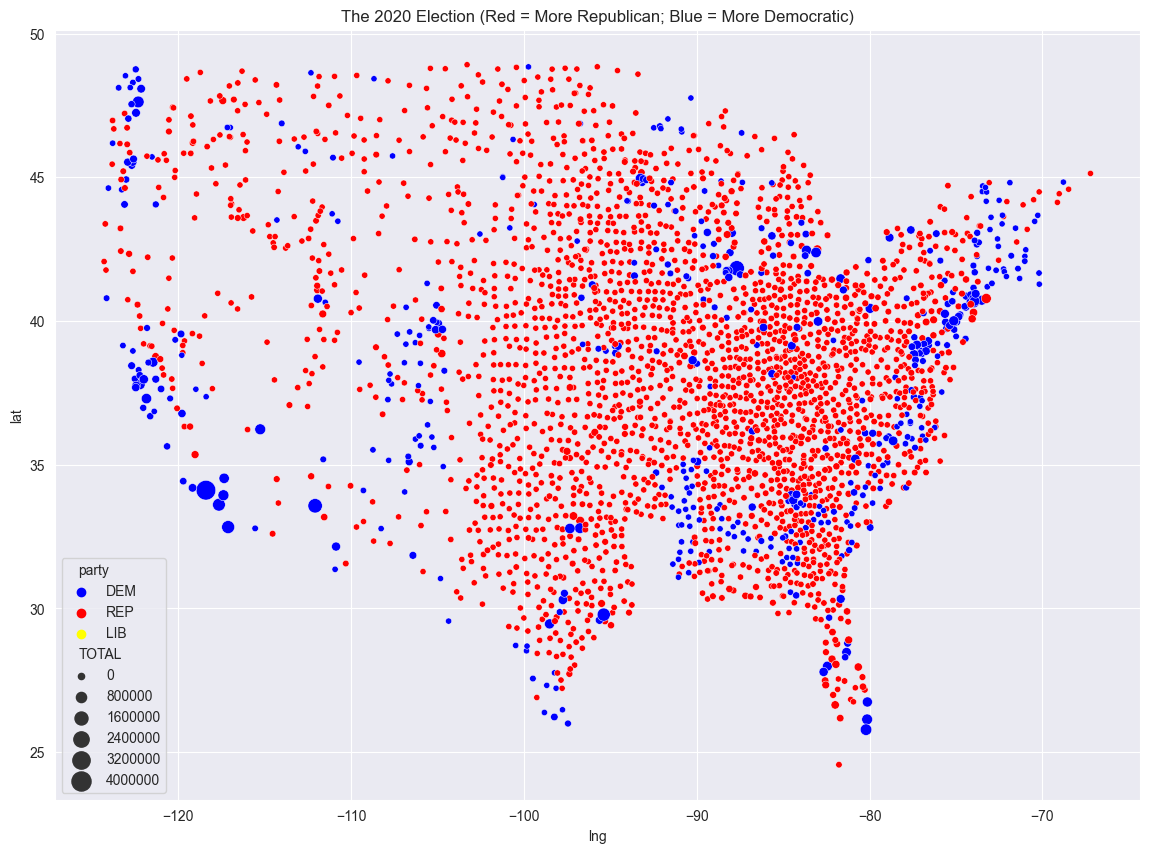

In [26]:
df_mainland = df_geo[~df_geo["state"].isin(["Alaska", "Hawaii"])]

plt.figure(figsize = (14,10))
sns.scatterplot(data = df_mainland, x = "lng", y = "lat", hue = "party", size = "TOTAL",
                sizes = (20, 200), palette = ['blue','red','yellow'])
plt.title("The 2020 Election (Red = More Republican; Blue = More Democratic)");


In [27]:
df_mainland.to_csv('/Users/jiaxincui/Documents/GitHub/git-exercise-AllysonCui/Data/Other/data3.csv')